<a href="https://colab.research.google.com/github/ashhssn/DontFall/blob/accelerometerdata/Sisfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/sisfall.zip", "r") as zip_ref:
    zip_ref.extractall("sisfall")


Found 23 young subject folders
Found 15 elderly subject folders
Found 75 fall files in SA16
Found 75 fall files in SA23
Found 75 fall files in SA03
Found 75 fall files in SA10
Found 75 fall files in SA22
Found 75 fall files in SA15
Found 75 fall files in SA12
Found 75 fall files in SA18
Found 75 fall files in SA02
Found 75 fall files in SA17
Found 75 fall files in SA06
Found 75 fall files in SA11
Found 73 fall files in SA20
Found 75 fall files in SA05
Found 75 fall files in SA08
Found 75 fall files in SA09
Found 75 fall files in SA04
Found 75 fall files in SA19
Found 75 fall files in SA01
Found 75 fall files in SA07
Found 75 fall files in SA13
Found 75 fall files in SA21
Found 75 fall files in SA14
Processed 1723 fall files from young subjects
Found 59 ADL files in SE12
Found 59 ADL files in SE05
Found 59 ADL files in SE01
Found 59 ADL files in SE13
Found 59 ADL files in SE09
Found 59 ADL files in SE04
Found 59 ADL files in SE11
Found 58 ADL files in SE15
Found 59 ADL files in SE14
Fou

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4361/4361 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5201 - loss: 0.7516 - val_accuracy: 0.5897 - val_loss: 0.6697 - learning_rate: 5.0000e-05
Epoch 2/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5892 - loss: 0.6602 - val_accuracy: 0.6215 - val_loss: 0.6467 - learning_rate: 5.0000e-05
Epoch 3/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6243 - loss: 0.6432 - val_accuracy: 0.6278 - val_loss: 0.6383 - learning_rate: 5.0000e-05
Epoch 4/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6289 - loss: 0.6366 - val_accuracy: 0.6304 - val_loss: 0.6354 - learning_rate: 5.0000e-05
Epoch 5/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6328 - loss: 0.6341 - val_accuracy: 0.6315 - val_loss: 0.6343 - learning_rate: 5.0000e-05
Epoch 6/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6329 - loss: 0.6330 - val_accuracy: 0.6317 - val_loss: 0.6335 - learning_rate: 5.0000e-05
Epoch 7/50
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - 

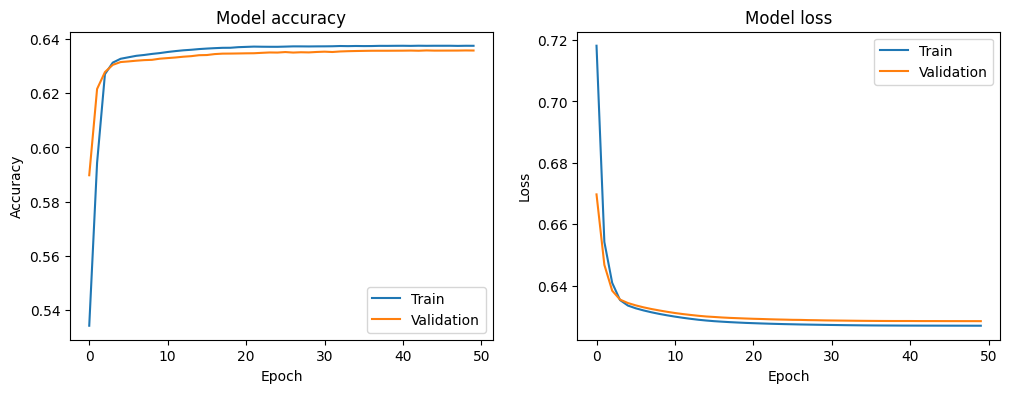

# Neural network weights for M5StickC Plus
self.weights1 = [
    [-0.11481944471597672, -0.23911553621292114, -0.07101264595985413, -0.12964028120040894],  # Feature 0
    [-0.5508483052253723, -0.7982009053230286, 0.22059978544712067, 0.2361690104007721],  # Feature 1
    [-0.5382730960845947, -0.6271637678146362, 0.24294281005859375, 0.08300460875034332],  # Feature 2
    [0.5596915483474731, 0.07642094790935516, -0.1889108121395111, -0.16385996341705322],  # Feature 3
    [0.5678039193153381, -0.4196859300136566, -0.34804582595825195, -0.3356752097606659],  # Feature 4
    [-0.045902069658041, 0.1593722403049469, 0.26741647720336914, 0.13585197925567627],  # Feature 5
    [-0.20872995257377625, -0.42193400859832764, -0.04040568321943283, 0.1242443099617958],  # Feature 6
]
self.biases1 = [0.12505561113357544, -0.5355587601661682, 0.13158567249774933, 0.06646212190389633]
self.weights2 = [1.1003971099853516, 1.147609829902649, -0.5385225415229797, -0.47447100281715393]
self.bias2 = -

In [20]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TerminateOnNaN, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set path to your dataset
base_path = '/content/sisfall/SisFall_dataset'

# Get all folders
sa_folders = glob.glob(os.path.join(base_path, 'SA*'))
se_folders = glob.glob(os.path.join(base_path, 'SE*'))

print(f"Found {len(sa_folders)} young subject folders")
print(f"Found {len(se_folders)} elderly subject folders")

# Simplified function to read and process a single file
def read_sisfall_file(file_path):
    try:
        # Read data with COMMA separator
        data = pd.read_csv(file_path, header=None, sep=',')

        if data.shape[1] < 9:
            return None, None, None

        # Convert to numeric, ignoring errors
        data = data.apply(pd.to_numeric, errors='coerce')

        # Extract MMA8451Q sensor data (columns 6, 7, 8)
        acc_x = data[6].values
        acc_y = data[7].values
        acc_z = data[8].values

        # Replace any remaining NaN values with 0
        acc_x = np.nan_to_num(acc_x)
        acc_y = np.nan_to_num(acc_y)
        acc_z = np.nan_to_num(acc_z)

        # Scale to g units (assuming data is in millig)
        scale_factor = 1/1000
        acc_x = acc_x * scale_factor
        acc_y = acc_y * scale_factor
        acc_z = acc_z * scale_factor

        return acc_x, acc_y, acc_z
    except Exception as e:
        return None, None, None

# Function to extract features from accelerometer data
def extract_features(acc_x, acc_y, acc_z, window_size=20):
    if acc_x is None or len(acc_x) < window_size:
        return []

    features_list = []

    for i in range(0, len(acc_x) - window_size, window_size // 2):  # 50% overlap
        x_window = acc_x[i:i+window_size]
        y_window = acc_y[i:i+window_size]
        z_window = acc_z[i:i+window_size]

        # Calculate magnitude
        mag = np.sqrt(x_window**2 + y_window**2 + z_window**2)

        # Extract the same 7 features as on M5StickC Plus
        avg_mag = np.mean(mag)
        std_mag = np.std(mag)
        max_mag = np.max(mag)
        min_mag = np.min(mag)

        # Jerk calculation
        jerk = np.abs(np.diff(mag))
        max_jerk = np.max(jerk) if len(jerk) > 0 else 0

        # Free-fall detection
        free_fall_threshold = 0.3  # Adjust based on data review
        free_fall_duration = np.sum(mag < free_fall_threshold)

        # Impact peak
        impact_peak = np.max(mag)

        # Create feature vector
        features = [avg_mag, std_mag, max_mag, min_mag,
                   max_jerk, free_fall_duration, impact_peak]

        features_list.append(features)

    return np.array(features_list)

# Collect fall data from young subjects (SA)
def collect_fall_data(sa_folders):
    X_falls = []
    processed_files = 0

    for folder in sa_folders:
        # Find all fall files in this folder
        fall_files = glob.glob(os.path.join(folder, 'F*.txt'))
        print(f"Found {len(fall_files)} fall files in {os.path.basename(folder)}")

        for file in fall_files:
            acc_x, acc_y, acc_z = read_sisfall_file(file)
            if acc_x is not None:
                features = extract_features(acc_x, acc_y, acc_z)
                if len(features) > 0:
                    X_falls.append(features)
                    processed_files += 1

    print(f"Processed {processed_files} fall files from young subjects")

    if len(X_falls) > 0:
        return np.vstack(X_falls)
    else:
        return np.array([])

# Collect ADL data from elderly subjects (SE)
def collect_adl_data(se_folders):
    X_adls = []
    processed_files = 0

    for folder in se_folders:
        # Find all ADL files in this folder
        adl_files = glob.glob(os.path.join(folder, 'D*.txt'))
        print(f"Found {len(adl_files)} ADL files in {os.path.basename(folder)}")

        for file in adl_files:
            acc_x, acc_y, acc_z = read_sisfall_file(file)
            if acc_x is not None:
                features = extract_features(acc_x, acc_y, acc_z)
                if len(features) > 0:
                    X_adls.append(features)
                    processed_files += 1

    print(f"Processed {processed_files} ADL files from elderly subjects")

    if len(X_adls) > 0:
        return np.vstack(X_adls)
    else:
        return np.array([])

# Build the full dataset
def build_dataset():
    # Get fall data from young subjects
    X_falls = collect_fall_data(sa_folders)

    # Get ADL data from elderly subjects
    X_adls = collect_adl_data(se_folders)

    if len(X_falls) > 0 and len(X_adls) > 0:
        # Combine into a single dataset
        X = np.vstack([X_falls, X_adls])

        # Create labels: 1 for falls, 0 for ADLs
        y = np.hstack([np.ones(len(X_falls)), np.zeros(len(X_adls))])

        print(f"Final dataset: {len(X)} samples, {len(X_falls)} falls, {len(X_adls)} ADLs")
        return X, y
    else:
        print("Insufficient data to build dataset")
        return np.array([]), np.array([])

# Build the dataset
X, y = build_dataset()

# Process dataset for stability
def prepare_dataset(X, y):
    if len(X) == 0:
        return X, y, None, None

    # Remove any NaN or Inf values
    X = np.nan_to_num(X)

    # Clip extreme values to prevent numerical instability
    percentile_99 = np.percentile(X, 99, axis=0)
    percentile_01 = np.percentile(X, 1, axis=0)
    X_clipped = np.clip(X, percentile_01, percentile_99)

    # Normalize features with StandardScaler
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X_clipped)

    # Save normalization parameters
    feature_means = scaler.mean_
    feature_stds = scaler.scale_

    return X_normalized, y, feature_means, feature_stds

# Prepare dataset
X_prepared, y_prepared, feature_means, feature_stds = prepare_dataset(X, y)

# Train model function with improved stability
def train_model_stable(X, y):
    if len(X) == 0:
        print("No data to train on")
        return None, None

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Create model with regularization
    model = Sequential([
        Dense(4, activation='relu', input_shape=(7,), kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
    ])

    lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,      # Reduce LR by half when triggered
    patience=3,      # Wait 3 epochs of no improvement
    min_lr=0.00001,  # Don't go below this LR
    verbose=1        # Show when LR is reduced
)
    # Use a lower learning rate and gradient clipping
    optimizer = Adam(learning_rate=0.00005, clipnorm=1.0)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Add callbacks to monitor training
    callbacks = [
        TerminateOnNaN(),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        lr_scheduler
    ]

    # Train model
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=128,  # Larger batch size for stability
                        validation_split=0.2,
                        callbacks=callbacks,
                        verbose=1)

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_acc:.4f}")

    # Plot training progress
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    return model, history

# Train the model with stability improvements
model, history = train_model_stable(X_prepared, y_prepared)

# Extract weights function with normalization information
def extract_weights(model, means, stds):
    if model is None:
        print("No model to extract weights from")
        return

    weights1 = model.layers[0].get_weights()[0].tolist()
    biases1 = model.layers[0].get_weights()[1].tolist()
    weights2 = model.layers[1].get_weights()[0].tolist()
    bias2 = model.layers[1].get_weights()[1].tolist()[0]

    print("# Neural network weights for M5StickC Plus")
    print("self.weights1 = [")
    for i in range(7):
        print(f"    {weights1[i]},  # Feature {i}")
    print("]")
    print(f"self.biases1 = {biases1}")
    print(f"self.weights2 = {[weights2[i][0] for i in range(4)]}")
    print(f"self.bias2 = {bias2}")

    # Print normalization parameters
    print("\n# Feature normalization values for M5StickC Plus")
    print("# Format: [avg_mag, std_mag, max_mag, min_mag, max_jerk, free_fall_duration, impact_peak]")
    print(f"self.feature_means = {means.tolist()}")
    print(f"self.feature_stds = {stds.tolist()}")

    # Modified normalize_inputs function for M5StickC Plus
    print("\n# Updated _normalize_inputs method for your M5StickC Plus")
    print("def _normalize_inputs(self, inputs):")
    print("    # Standardize inputs using the same method as training")
    print("    normalized = []")
    print("    for i in range(7):")
    print("        normalized.append((inputs[i] - self.feature_means[i]) / self.feature_stds[i])")
    print("    return normalized")

# Extract weights
if model is not None:
    extract_weights(model, feature_means, feature_stds)

    # Save model for future use
    model.save('fall_detection_model.h5')